In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import shutil


os.makedirs("/content/dataset/with_mask", exist_ok=True)
os.makedirs("/content/dataset/without_mask", exist_ok=True)


for filename in os.listdir("/content"):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        lower = filename.lower()
        src_path = os.path.join("/content", filename)
        if "with" in lower or "mask" in lower:
            shutil.move(src_path, "/content/dataset/with_mask/" + filename)
        elif "no" in lower or "without" in lower:
            shutil.move(src_path, "/content/dataset/without_mask/" + filename)

print("✅ Images organized into dataset folders.")

✅ Images organized into dataset folders.


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True


In [18]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "/content/dataset",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/content/dataset",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)


Found 4230 images belonging to 2 classes.
Found 1057 images belonging to 2 classes.


In [19]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=INIT_LR), loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9273 - loss: 0.1432 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 1.0000 - loss: 8.7594e-04 - val_accuracy: 1.0000 - val_loss: 3.4779e-04
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 1.0000 - loss: 3.0053e-04 - val_accuracy: 1.0000 - val_loss: 1.7531e-04
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 1.0000 - loss: 1.5837e-04 - val_accuracy: 1.0000 - val_loss: 1.0750e-04
Epoch 5/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 1.0000 - loss: 9.2925e-05 - val_accuracy: 1.0000 - val_loss: 7.3024e-05


In [21]:
val_loss, val_accuracy = model.evaluate(val_data)
print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

34/34 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 1.0000 - loss: 8.0466e-05
Validation Accuracy: 1.0
Validation Loss: 7.302372250705957e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


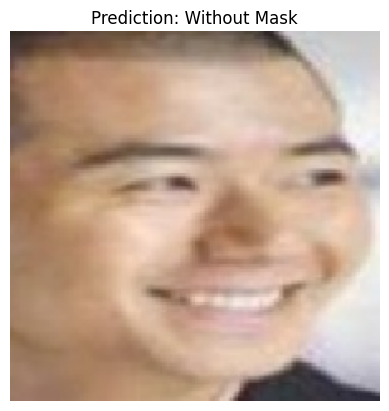

In [22]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = "/content/test.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)
label = "With Mask" if prediction[0][0] > 0.5 else "Without Mask"

# Show the image and prediction
plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()
